# Covid-19 Cases in China

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_column', None)

## 1.1 Case Trace information

The case trace data in China is stored in a dictionary `province_dict` by a Pandas Dataframe for each province.

Note: These dataframes have different columns because different provinces have different records format. 

In [2]:
os.listdir('data_china_province/')   
#shanxi is 陕西, shanxijin is 山西
#Case data is updated to 2020.4.24

['15tianjin.json',
 '25gansu.json',
 '14fujian.json',
 '18guangxi.json',
 '16yunnan.json',
 '.DS_Store',
 '4jiangsu.json',
 '32xianggang.json',
 '2henan.json',
 '11shandong.json',
 '12shanxijin.json',
 '7shanghai.json',
 '8hebei.json',
 '13chongqing.json',
 '24guizhou.json',
 '9shanxi.json',
 '17sichuan.json',
 '33aomen.json',
 '1anhui.json',
 '5guangdong.json',
 '3zhejiang.json',
 '21liaoning.json',
 '23neimenggu.json']

In [3]:
def find_province(file_name):
    return ''.join([x if x.isalpha() else '' for x in file_name[:-5]])

In [4]:
def data_processing(load):
    df = pd.DataFrame([])
    for (i,case) in enumerate(load):
        d = dict()
        for col in case:
            if type(col)==dict:
                d[col['key']] = col['value']
        #print(i)
        df = df.append(pd.DataFrame(d,index=[i]))
    return df

In [5]:
path = 'data_china_province/'
province_dict = dict()
for file_name in os.listdir(path):
    if file_name[0] != '.':
        province = find_province(file_name)
        print(province)
        with open(path+file_name,'r') as load_f:
            load = json.load(load_f)            
            if type(load[0])!=dict:
                df = data_processing(load)
                province_dict[province] = df
            else:
                province_dict[province] = pd.DataFrame(load)
                

tianjin


/Users/yaoyanglin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


gansu
fujian
guangxi
yunnan
jiangsu
xianggang
henan
shandong
shanxijin
shanghai
hebei
chongqing
guizhou
shanxi
sichuan
aomen
anhui
guangdong
zhejiang
liaoning
neimenggu


In [6]:
province_dict.keys()

dict_keys(['tianjin', 'gansu', 'fujian', 'guangxi', 'yunnan', 'jiangsu', 'xianggang', 'henan', 'shandong', 'shanxijin', 'shanghai', 'hebei', 'chongqing', 'guizhou', 'shanxi', 'sichuan', 'aomen', 'anhui', 'guangdong', 'zhejiang', 'liaoning', 'neimenggu'])

In [23]:
province_dict['zhejiang']

,事件,出行方式,区/县,发病地点,发病日期,地点,审核状态,密切患者,密触人数,市,年龄,开始时间,性别,患者名,患者编号,数据源1,数据源2,时间,是否湖北居民,病症,目的（下车）地,省,确诊医院,确诊日期,离鄂城市,离鄂时间,结束时间,起始（上车）地,车次/车厢/座位,镇/街道
0,,,上城区,杭州市,2020-01-18T16:00:00.000Z,,,,,杭州市,45,,男,,0571000001,,,,否,体温37.6℃，无咳嗽等其他症状,,浙江省,定点医院,2020-01-18T16:00:00.000Z,武汉,2020-01-15T16:00:00.000Z,,,,
1,,,江干区,杭州市,2020-01-21T16:00:00.000Z,,,,,杭州市,30,,女,,0571000002,,,,否,头痛，两肺存在影像学改变，无发热、咳嗽等其他症状,,浙江省,定点医疗机构,2020-01-21T16:00:00.000Z,武汉,2020-01-17T16:00:00.000Z,,,,
2,,,余杭区,杭州市,2020-01-23T16:00:00.000Z,,,,,杭州市,31,,男,,0571000003,,,,否,发热，体温37.4℃，胸闷，有少量痰，无咳嗽,,浙江省,定点医疗机构,2020-01-23T16:00:00.000Z,武汉,2020-01-18T16:00:00.000Z,,,,
3,,,临安区,杭州市,2020-01-23T16:00:00.000Z,,,,,杭州市,63,,女,,0571000004,,,,否,1月16日在武汉发病，咳嗽，少痰，咽痒,,浙江省,定点医院,2020-01-23T16:00:00.000Z,武汉,2020-01-22T16:00:00.000Z,,,,
4,,,下城区,杭州市,2020-01-21T16:00:00.000Z,,,,,杭州市,24,,女,,0571000005,,,,,体温37.4℃，有流涕等症状,,浙江省,定点医院,2020-01-21T16:00:00.000Z,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,,,庆元县,,2020-01-22T16:00:00.000Z,,,有,,丽水市,24,,男,吴某,0578000013,http://wsjsw.lishui.gov.cn/xwzx/bjdt/202002/t2...,,,,23日出现发热、乏力,,浙江省,,2020-01-31T16:00:00.000Z,,,,,,
1196,,,庆元县,,2020-01-22T16:00:00.000Z,,,,,丽水市,54,,女,许某,0578000014,http://wsjsw.lishui.gov.cn/xwzx/bjdt/202002/t2...,,,,23日出现发热,,浙江省,,2020-01-31T16:00:00.000Z,,,,,,
1197,,,青田县,,2020-01-29T16:00:00.000Z,,,,,丽水市,57,,男,程某,0578000015,http://wsjsw.lishui.gov.cn/xwzx/bjdt/202002/t2...,,,,30日发热、乏力、咳嗽送当地定点医院诊治,,浙江省,,2020-02-01T16:00:00.000Z,武汉,2020-01-22T16:00:00.000Z,,,,
1198,,,庆元县,,2020-01-31T16:00:00.000Z,,,有,,丽水市,47,,女,林某,0578000016,http://wsjsw.lishui.gov.cn/xwzx/bjdt/202002/t2...,,,,出现发热、乏力送当地定点医院诊治,,浙江省,,2020-02-01T16:00:00.000Z,,,,,,


In [34]:

data = province_dict['zhejiang']

data.drop_duplicates(subset ="患者编号", 
                     keep = False, inplace = True) 

data

,事件,出行方式,区/县,发病地点,发病日期,地点,审核状态,密切患者,密触人数,市,年龄,开始时间,性别,患者名,患者编号,数据源1,数据源2,时间,是否湖北居民,病症,目的（下车）地,省,确诊医院,确诊日期,离鄂城市,离鄂时间,结束时间,起始（上车）地,车次/车厢/座位,镇/街道
0,,,上城区,杭州市,2020-01-18T16:00:00.000Z,,,,,杭州市,45,,男,,0571000001,,,,否,体温37.6℃，无咳嗽等其他症状,,浙江省,定点医院,2020-01-18T16:00:00.000Z,武汉,2020-01-15T16:00:00.000Z,,,,
1,,,江干区,杭州市,2020-01-21T16:00:00.000Z,,,,,杭州市,30,,女,,0571000002,,,,否,头痛，两肺存在影像学改变，无发热、咳嗽等其他症状,,浙江省,定点医疗机构,2020-01-21T16:00:00.000Z,武汉,2020-01-17T16:00:00.000Z,,,,
2,,,余杭区,杭州市,2020-01-23T16:00:00.000Z,,,,,杭州市,31,,男,,0571000003,,,,否,发热，体温37.4℃，胸闷，有少量痰，无咳嗽,,浙江省,定点医疗机构,2020-01-23T16:00:00.000Z,武汉,2020-01-18T16:00:00.000Z,,,,
3,,,临安区,杭州市,2020-01-23T16:00:00.000Z,,,,,杭州市,63,,女,,0571000004,,,,否,1月16日在武汉发病，咳嗽，少痰，咽痒,,浙江省,定点医院,2020-01-23T16:00:00.000Z,武汉,2020-01-22T16:00:00.000Z,,,,
4,,,下城区,杭州市,2020-01-21T16:00:00.000Z,,,,,杭州市,24,,女,,0571000005,,,,,体温37.4℃，有流涕等症状,,浙江省,定点医院,2020-01-21T16:00:00.000Z,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,,,庆元县,,2020-01-22T16:00:00.000Z,,,有,,丽水市,24,,男,吴某,0578000013,http://wsjsw.lishui.gov.cn/xwzx/bjdt/202002/t2...,,,,23日出现发热、乏力,,浙江省,,2020-01-31T16:00:00.000Z,,,,,,
1196,,,庆元县,,2020-01-22T16:00:00.000Z,,,,,丽水市,54,,女,许某,0578000014,http://wsjsw.lishui.gov.cn/xwzx/bjdt/202002/t2...,,,,23日出现发热,,浙江省,,2020-01-31T16:00:00.000Z,,,,,,
1197,,,青田县,,2020-01-29T16:00:00.000Z,,,,,丽水市,57,,男,程某,0578000015,http://wsjsw.lishui.gov.cn/xwzx/bjdt/202002/t2...,,,,30日发热、乏力、咳嗽送当地定点医院诊治,,浙江省,,2020-02-01T16:00:00.000Z,武汉,2020-01-22T16:00:00.000Z,,,,
1198,,,庆元县,,2020-01-31T16:00:00.000Z,,,有,,丽水市,47,,女,林某,0578000016,http://wsjsw.lishui.gov.cn/xwzx/bjdt/202002/t2...,,,,出现发热、乏力送当地定点医院诊治,,浙江省,,2020-02-01T16:00:00.000Z,,,,,,


In [46]:
len(data.groupby(["年龄", "性别", "区/县"]).size() == 1)

153

In [8]:
province_dict['fujian'].head()

,是否湖北居民,患者编号,患者名,省,市,区/县,镇/街道,年龄,性别,密切患者,离鄂时间,离鄂城市,发病日期,发病地点,确诊日期,确诊医院,病症,密触人数,时间,出行方式,车次/车厢/座位,起始（上车）地,目的（下车）地,地点,事件,开始时间,结束时间,数据源1,数据源2,审核状态
0,否,0591000001,郑某某,福建省,福州市,长乐区,漳港街道仙岐村,0,男,,2020-01-20T16:00:00.000Z,武汉市,2020-01-18T16:00:00.000Z,武汉市,2020-01-25T16:00:00.000Z,长乐区医院,发热,5,2020-01-20T16:00:00.000Z,自驾,,武汉市,温州市,,长乐接人,2020-01-20T16:00:00.000Z,2020-01-22T16:00:00.000Z,http://www.hxnews.com/news/fj/fz/202002/04/185...,,已审核
1,,0591000001,,,,,,0,,,,,,,,,,,2020-01-20T16:00:00.000Z,自驾,,温州市,福州市,,,2020-01-20T16:00:00.000Z,2020-01-22T16:00:00.000Z,http://www.hxnews.com/news/fj/fz/202002/04/185...,,
2,,0591000001,,,,,,0,,,,,,,,,,,2020-01-22T16:00:00.000Z,自驾,,福州市长乐区仙岐村,长乐区医院,,,2020-01-22T16:00:00.000Z,2020-01-22T16:00:00.000Z,http://www.hxnews.com/news/fj/fz/202002/04/185...,,
3,否,0591000002,陈某某,福建省,福州市,长乐区,漳港街道龙峰村,0,女,,2020-01-20T16:00:00.000Z,武汉市,2020-01-24T16:00:00.000Z,福州市长乐区漳港街道龙峰村,2020-01-28T16:00:00.000Z,长乐区医院,发热,3,2020-01-20T16:00:00.000Z,飞机,西部航空PN6219,武汉市,漳港街道龙峰村家中,,,,,http://www.hxnews.com/news/fj/fz/202002/04/185...,,已审核
4,,0591000002,,,,,,0,,,,,,,,,,,2020-01-24T16:00:00.000Z,急救车,,福州市长乐区龙峰村,长乐区医院,,,,,http://www.hxnews.com/news/fj/fz/202002/04/185...,,


In [9]:
record_num = [] #case num in each province
for prov in province_dict.keys():
    record_num.append((prov,len(province_dict[prov])))
record_num

[('tianjin', 651),
 ('gansu', 3),
 ('fujian', 78),
 ('guangxi', 42),
 ('yunnan', 212),
 ('jiangsu', 403),
 ('xianggang', 123),
 ('henan', 233),
 ('shandong', 505),
 ('shanxijin', 27),
 ('shanghai', 13),
 ('hebei', 206),
 ('chongqing', 621),
 ('guizhou', 66),
 ('shanxi', 50),
 ('sichuan', 122),
 ('aomen', 25),
 ('anhui', 256),
 ('guangdong', 721),
 ('zhejiang', 1200),
 ('liaoning', 105),
 ('neimenggu', 20)]

<BarContainer object of 22 artists>

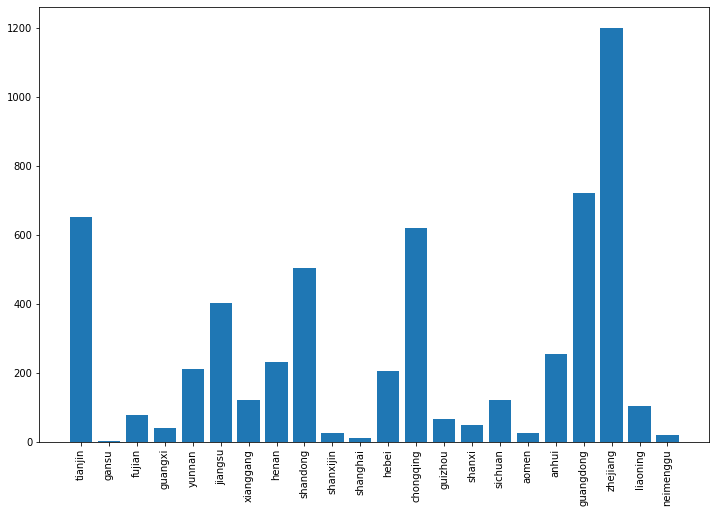

In [10]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = [a[0] for a in record_num], height = [a[1] for a in record_num])


## 1.2 Covid-19 trend in China

`ncov`: a DataFrame that contains case numbers trends in different countries and provinces/cities in China.

`ncov_china`: only contains case trends in China


In [11]:
ncov = pd.read_csv("https://raw.githubusercontent.com/canghailan/Wuhan-2019-nCoV/master/Wuhan-2019-nCoV.csv")

In [12]:
ncov.head()

,date,country,countryCode,province,provinceCode,city,cityCode,confirmed,suspected,cured,dead
0,2019-12-01,中国,CN,NaN,NaN,NaN,NaN,1,0,0,0
1,2019-12-01,中国,CN,湖北省,420000.0,NaN,NaN,1,0,0,0
2,2019-12-01,中国,CN,湖北省,420000.0,武汉市,420100,1,0,0,0
3,2019-12-02,中国,CN,NaN,NaN,NaN,NaN,1,0,0,0
4,2019-12-02,中国,CN,湖北省,420000.0,NaN,NaN,1,0,0,0


In [13]:
ncov.date = pd.to_datetime(ncov.date)
ncov['provinceCode']=ncov['province'].astype(object)

In [14]:
print('The data is updated to:', ncov['date'].max())

The data is updated to: 2020-04-24 00:00:00


In [15]:
ncov_china = ncov[ncov['country']=='中国']
ncov_china

,date,country,countryCode,province,provinceCode,city,cityCode,confirmed,suspected,cured,dead
0,2019-12-01,中国,CN,NaN,NaN,NaN,NaN,1,0,0,0
1,2019-12-01,中国,CN,湖北省,湖北省,NaN,NaN,1,0,0,0
2,2019-12-01,中国,CN,湖北省,湖北省,武汉市,420100,1,0,0,0
3,2019-12-02,中国,CN,NaN,NaN,NaN,NaN,1,0,0,0
4,2019-12-02,中国,CN,湖北省,湖北省,NaN,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
57167,2020-04-24,中国,CN,台湾省,台湾省,台湾省,710000,428,0,264,6
57168,2020-04-24,中国,CN,香港特别行政区,香港特别行政区,NaN,NaN,1035,0,699,4
57169,2020-04-24,中国,CN,香港特别行政区,香港特别行政区,香港特别行政区,810000,1035,0,699,4
57170,2020-04-24,中国,CN,澳门特别行政区,澳门特别行政区,NaN,NaN,45,0,27,0


In [16]:
ncov_china = ncov[ncov['country']=='中国']
chinacase = ncov_china[ncov_china['province'].isna()][['date','confirmed','suspected','cured','dead']]

/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Cumulated cases')

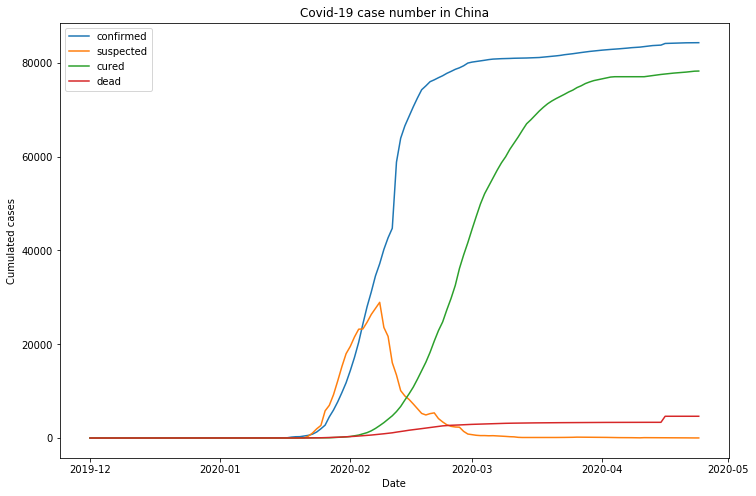

In [17]:
plt.figure(figsize=(12,8))
plt.plot(chinacase['date'],chinacase['confirmed'],label='confirmed')
plt.plot(chinacase['date'],chinacase['suspected'],label='suspected')
plt.plot(chinacase['date'],chinacase['cured'],label='cured')
plt.plot(chinacase['date'],chinacase['dead'],label='dead')
plt.legend()
plt.title('Covid-19 case number in China')
plt.xlabel('Date')
plt.ylabel('Cumulated cases')

## 1.3 Data privacy and case trends for different provinces in China

In [18]:
ncov_china['province'].unique()

array([nan, '湖北省', '广东省', '北京市', '吉林省', '上海市', '浙江省', '安徽省', '江西省', '山东省',
       '广西壮族自治区', '海南省', '四川省', '贵州省', '云南省', '宁夏回族自治区', '天津市', '山西省',
       '黑龙江省', '河南省', '湖南省', '重庆市', '河北省', '辽宁省', '江苏省', '福建省', '陕西省',
       '台湾省', '香港特别行政区', '澳门特别行政区', '内蒙古自治区', '甘肃省', '新疆维吾尔自治区', '青海省',
       '西藏自治区'], dtype=object)

In [19]:
def plot_province_cases(prov_English_list, prov_Chinese_list, figuresize):
    plt.figure(figsize=figuresize)
    for (i,pro) in enumerate(prov_English_list):
        case = ncov_china[ncov_china['province']==prov_Chinese_list[i]][ncov_china['city'].isna()]
        plt.plot(case['date'],case['confirmed'],label=prov_English_list[i])
    plt.legend()
    plt.title('Covid-19 trends for provinces in China')
    plt.xlabel('Date')
    plt.ylabel('Cumulated Cases')
    plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


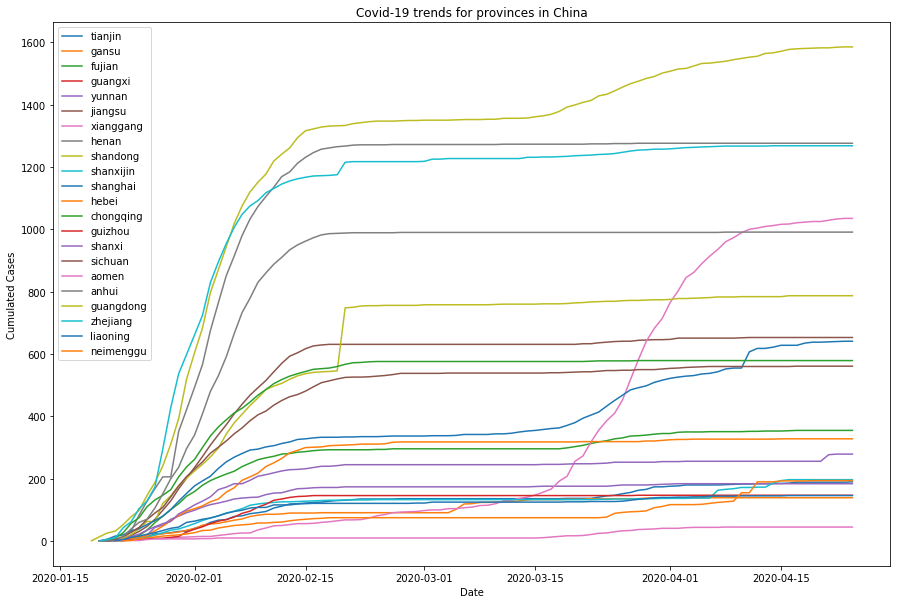

In [20]:
provinces = [x[0] for x in record_num]
Chineseprovince = ['天津市','甘肃省','福建省','广西省','云南省','江苏省','香港特别行政区','河南省','山东省','山西省','上海市','河北省',
                   '重庆市','贵州省','陕西省','四川省','澳门特别行政区','安徽省','广东省','浙江省','辽宁省','内蒙古自治区']
plot_province_cases(provinces, Chineseprovince,(15,10))

In [21]:
def cal_missing_transport_proportion(province_English): #input: string
    return len(province_dict[province_English][province_dict[province_English]['出行方式']==''])/len(province_dict[province_English])


In [22]:
for prov_ in provinces:
    if prov_ not in ['shandong','gansu']:
        print('The missing transport proportion in {}: '.format(prov_), cal_missing_transport_proportion(prov_))
    

The missing transport proportion in tianjin:  0.9585253456221198
The missing transport proportion in fujian:  0.4230769230769231
The missing transport proportion in guangxi:  0.5
The missing transport proportion in yunnan:  0.4528301886792453
The missing transport proportion in jiangsu:  0.5186104218362283
The missing transport proportion in xianggang:  0.8130081300813008
The missing transport proportion in henan:  0.7381974248927039
The missing transport proportion in shanxijin:  0.7777777777777778
The missing transport proportion in shanghai:  1.0
The missing transport proportion in hebei:  0.5388349514563107
The missing transport proportion in chongqing:  0.5942028985507246
The missing transport proportion in guizhou:  0.8333333333333334
The missing transport proportion in shanxi:  0.94
The missing transport proportion in sichuan:  0.6229508196721312
The missing transport proportion in aomen:  0.76
The missing transport proportion in anhui:  0.984375
The missing transport proportion

For example, Henan, Hebei, Yunnan, Anhui provinces have similar number of case trace records (200-300 records) but have different proportion of missing data in patients' transport. The spread speed is different as shown in the figure below.

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


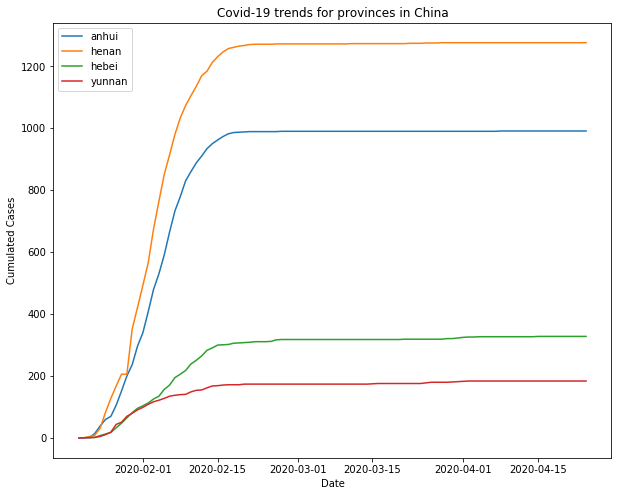

In [23]:
plot_province_cases(['anhui','henan','hebei','yunnan'], ['安徽省','河南省','河北省','云南省'],(10,8))

In [24]:
for prov_ in ['anhui','henan','hebei','yunnan']:
    print('The missing transport proportion in {}: '.format(prov_), cal_missing_transport_proportion(prov_))

The missing transport proportion in anhui:  0.984375
The missing transport proportion in henan:  0.7381974248927039
The missing transport proportion in hebei:  0.5388349514563107
The missing transport proportion in yunnan:  0.4528301886792453
